## **Polynomial Regression Using Sklearn**

Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. (Source : https://en.wikipedia.org/wiki/Polynomial_regression)

In [13]:
#import packages -- dont forget to import polynomial package

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  #linear regression class 

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures #polynomial regression class


from sklearn import metrics
from scipy import stats
%matplotlib inline

In [14]:
#laod the file simulation
df = pd.read_csv('simulation-polinom.csv')
df.head(10)

,x,y
0,-3.0,9.00
1,-2.9,8.41
2,-2.8,7.84
3,-2.7,7.29
4,-2.6,6.76
5,-2.5,6.25
6,-2.4,5.76
7,-2.3,5.29
8,-2.2,4.84
9,-2.1,4.41


In [15]:
#show the tail
df.tail(10)

,x,y
126,9.6,92.16
127,9.7,94.09
128,9.8,96.04
129,9.9,98.01
130,10.0,100.00
131,10.1,102.01
132,10.2,104.04
133,10.3,106.09
134,10.4,108.16
135,10.5,110.25


## Exploratory Data Analysis

In [4]:
#check the type of column
df.dtypes

x    float64
y    float64
dtype: object

In [5]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 2 columns):
x    136 non-null float64
y    136 non-null float64
dtypes: float64(2)
memory usage: 2.2 KB


In [16]:
#check the statisctical descriptive
df.describe()

,x,y
count,136.000000,136.000000
mean,3.750000,31.013625
std,3.940389,33.208650
min,-3.000000,0.010000
25%,0.375000,4.000000
50%,3.750000,14.065000
75%,7.125000,56.000000
max,10.500000,110.250000


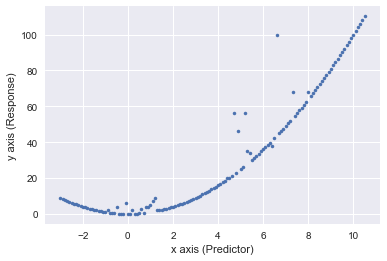

In [17]:
#Scatter plot of those data with assumption x = predictor and y = response

plt.plot(df['x'], df['y'], marker='.', linestyle='none')
plt.xlabel('x axis (Predictor)')
plt.ylabel('y axis (Response)')
plt.show()

From the data above, using scatter plot, we have a hypothesis that actually there is a strong positive correlation between x and y. So, high possibility that the error rate in regression is too small as well and can be represented very well. Because if we see the scatter plot, the intercept is too small.

## First attempt : Linear Regression

In [18]:
#Split the data into two parts (training and testing). it can be used to know the accuracy of model. Put 80% training and 20% testing separation
X = df['x'].values.reshape(-1,1)
y = df['y'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
#check the separation
print('X train length : ', len(X_train))
print('Y train length : ', len(y_train))
print('X test length : ', len(X_test))
print('Y test length : ', len(y_test))

X train length :  108
Y train length :  108
X test length :  28
Y test length :  28


In [20]:
#Creating a model using training dataset
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
#Show the slope using function
print('Slope : ', regressor.coef_)

#Show the intercept
print('Intercept : ', regressor.intercept_)

Slope :  [[7.74514004]]
Intercept :  [3.28327352]


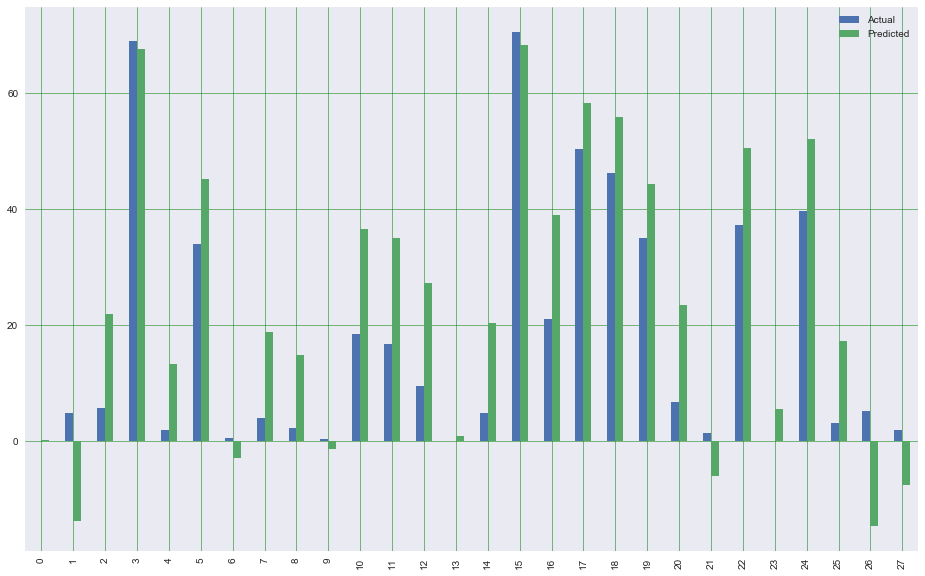

In [22]:
#Comparing y prediction with y actual and see the accuration
y_prediction = regressor.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_prediction.flatten()})

#Plotting the comparison

comparison.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

We can see the different between the actual and prediction is too far and we doubt that linear regression is going to fit with the data

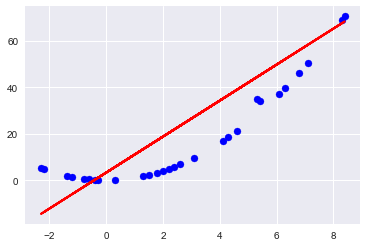

In [23]:
#Plot the scatter of test data

plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_prediction, color='red', linewidth=2)
plt.show()

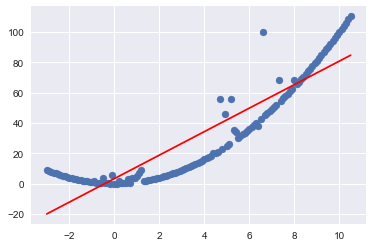

In [29]:
#plot in all dataset

y_all = regressor.predict(X)

#show the scatter
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], y_all, color = 'red')
plt.show()

### Evaluation Metrics

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

Mean Absolute Error: 10.968605236825393
Mean Squared Error: 157.2469951049267
Root Mean Squared Error: 12.53981639039929


## Second Attempt : Polynomial Regression

In [40]:
#call and assign the model

polinom = PolynomialFeatures(degree=2)  #starting from degree 2
x_poly = polinom.fit_transform(X)

polinomial_test = LinearRegression()
polinomial_test.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

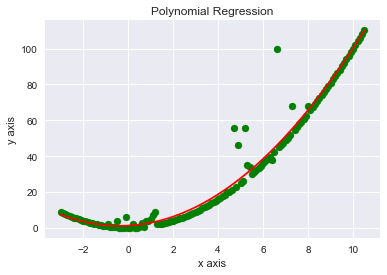

In [41]:
#plot the scatter

plt.scatter(X, y, color='green')
plt.plot(X, polinomial_test.predict(polinom.fit_transform(X)), color='red')
plt.title('Polynomial Regression')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

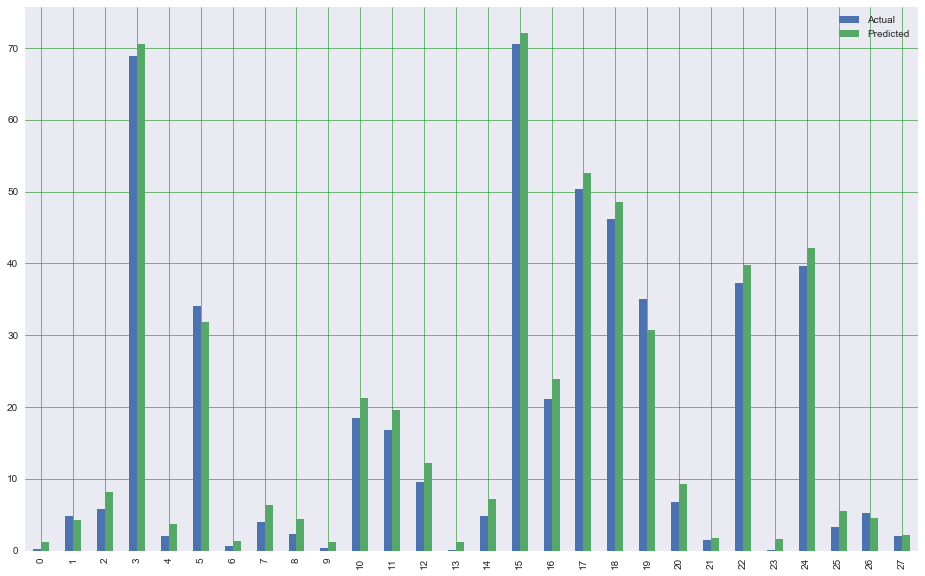

In [45]:
#Comparing y prediction with y actual and see the accuration
comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': polinomial_test.predict(polinom.fit_transform(X_test)).flatten()})

#Plotting the comparison

comparison.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

With polynomial regression 2th degree, the different between actual and prediction is not really far.

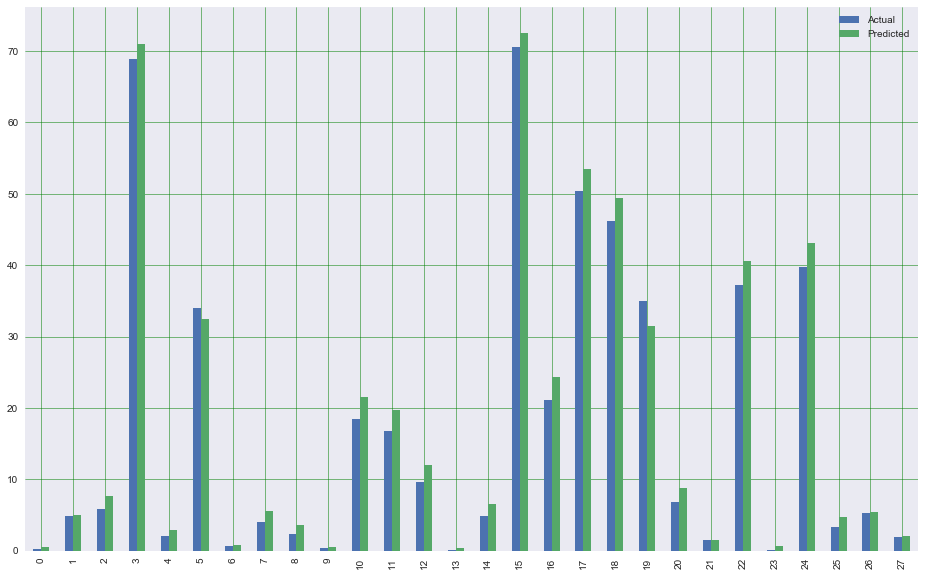

In [47]:
#call and assign the model with degree 3

polinom3 = PolynomialFeatures(degree=3)  #starting from degree 3
x_poly3 = polinom3.fit_transform(X)

polinomial_test3 = LinearRegression()
polinomial_test3.fit(x_poly3, y)

#Comparing y prediction with y actual and see the accuration
comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': polinomial_test3.predict(polinom3.fit_transform(X_test)).flatten()})

#Plotting the comparison

comparison.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Evaluation Metrics

In [48]:
print('Evaluation polynomial with degree 2')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, polinomial_test.predict(polinom.fit_transform(X_test))))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, polinomial_test.predict(polinom.fit_transform(X_test))))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, polinomial_test.predict(polinom.fit_transform(X_test)))))

Evaluation polynomial with degree 2
Mean Absolute Error: 1.8666622334783536
Mean Squared Error: 4.326549633751064
Root Mean Squared Error: 2.08003596934069


In [49]:
print('Evaluation polynomial with degree 3')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, polinomial_test3.predict(polinom3.fit_transform(X_test))))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, polinomial_test3.predict(polinom3.fit_transform(X_test))))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, polinomial_test3.predict(polinom3.fit_transform(X_test)))))

Evaluation polynomial with degree 3
Mean Absolute Error: 1.6539108906579365
Mean Squared Error: 4.173921188726077
Root Mean Squared Error: 2.0430176672574514


Based on evaluation metrics, we can see that polynomial error is lee